In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv("stocks.csv")
data.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [7]:
data.isnull().sum()


,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
62,MSFT,2023-02-07,260.529999,268.769989,260.079987,267.559998,266.891510,50841400
186,GOOG,2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800
124,NFLX,2023-02-07,358.510010,364.179993,354.179993,362.950012,362.950012,6289400
187,GOOG,2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000


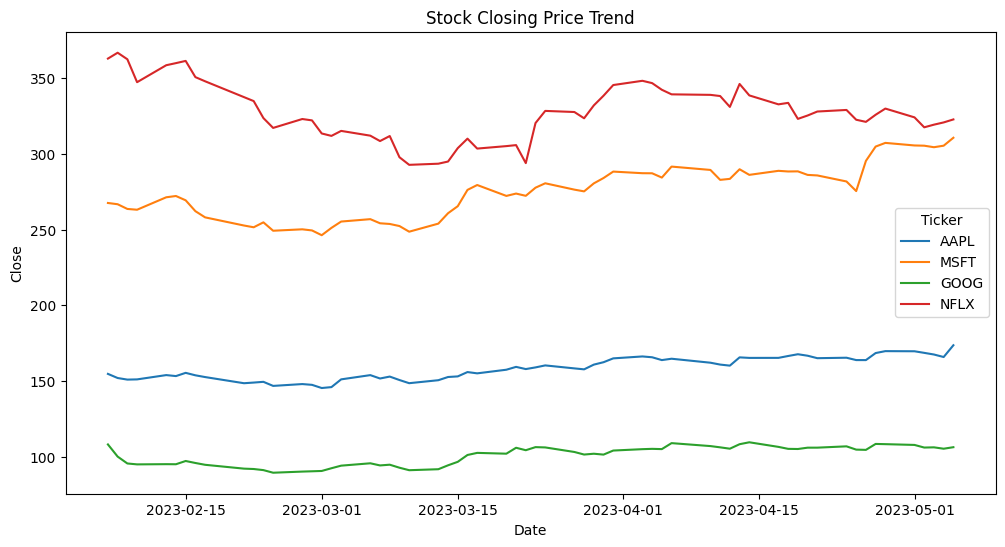

In [9]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x="Date", y="Close", hue="Ticker")
plt.title("Stock Closing Price Trend")
plt.show()


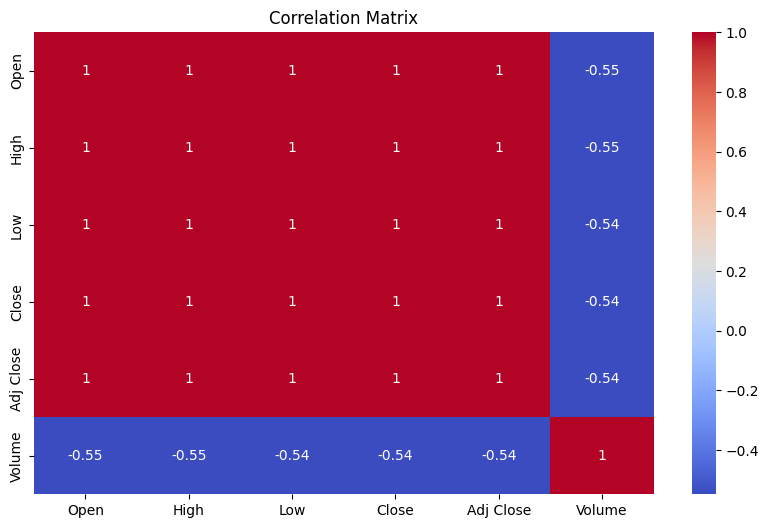

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include=['number']).corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
predictions = model.predict(X_test)

error = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", error)


Mean Absolute Error: 1.1759631622286966


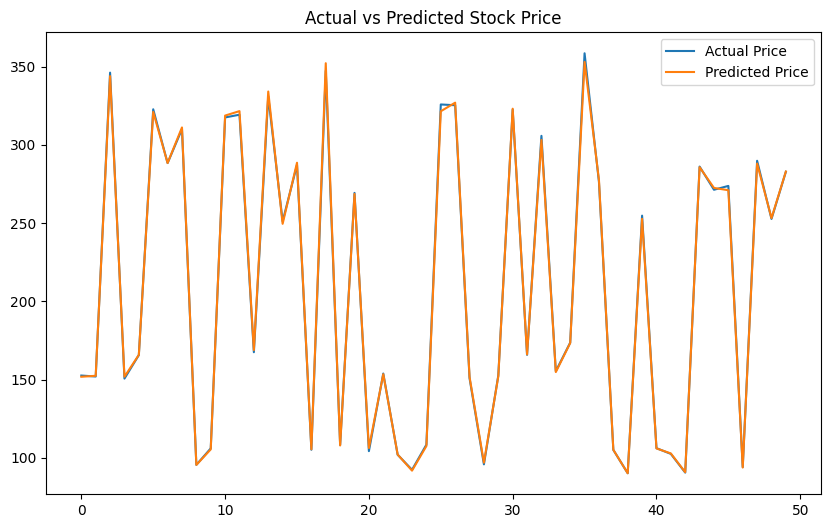

In [18]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Stock Price")
plt.show()


In [19]:
import sqlite3

conn = sqlite3.connect("stock_data.db")
data.to_sql("stocks", conn, if_exists="replace", index=False)


248

In [20]:
query = "SELECT Ticker, AVG(Close) as Avg_Close FROM stocks GROUP BY Ticker"
result = pd.read_sql(query, conn)

result


,Ticker,Avg_Close
0,AAPL,158.240645
1,GOOG,100.631532
2,MSFT,275.039839
3,NFLX,327.614677


In [21]:
result.to_excel("stock_analysis.xlsx", index=False)
